## Utility and Rationality
Utility, Rationalityが与えられた時に、どの程度の情報がPreference feedbackから
得られるかを調べる。これにより、Utilityを推定するのに、どの位のフィードバック数が
必要となるかを考える。

また、異なるRationalityを持つ複数の人間からのフィードバックを受け取った場合、
Rationalityを知っている場合と、知らない場合では、どの程度の差があるか調べる。

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Rationalityを知る事のメリットを計算する

異なるRationalityを持つTrainerからのフィードバックを受け取った際、個々のRationalityを知ることでより良い推定が可能かどうかを考える。

ここでは、ThesisのHuman Feedbackの時と同様に、MI (Mutual Infromation)を用いた計算をする事を考える。

単純に、あるペア(item-i vs item-j)のRankingを考え、それぞれのUtility値の差を

$$\Delta_{ij}=u_i - u_j$$
    
と書く事にする。また３人のトレーナーのRationalityを$\beta_1, \beta_2, \beta_3$とする。TrainerのフィードバックモデルにはBradley-Terryモデルを用いて、item-j よりも item-i を選択する確率は以下の様に表される。

$$ P(i\succ j) = \frac{\exp(\beta u_i)}{\exp(\beta u_i)+\exp(\beta u_j)}=\sigma(\beta(u_i - u_j)) = \sigma(\beta \Delta_{ij})$$

また、BSC(Binary Synmetric Channel)を考えた場合、正しいPreference Feedbackをする確率は、$P_c = \sigma(\beta |\Delta_{ij}|)$となり、誤ったFeedbackをする確率は、$P_e = (1-Pc) = \sigma(-\beta |\Delta_{ij}|)$と書ける。これらを用いて、Preference Feedback一つ当たりの平均の情報量は、以下のMutual Informationの式で表される。

$$ MI(x,y) = H(x) - H(x|y) = 1.0 + P_c \log_2P_c + (1-P_c) \log_2(1-P_c)$$

ここで、$x = \{u_i \ge u_j, u_i \lt u_j\}$, $y = \{i \succ j,  i \prec j\}$。ここで、各TrainerのFeedbackを分けて、それぞれのRationalityを考慮した場合$\mathbb{E}_p[MI(x,y;p)]$と、区別せずに合わせた場合$MI(x,y;\mathbb{E}_p[p])$を比較する。

単純に上のMIの式から、MIはｐに対して、Strictly Concaveである事が分かる。よってJensen's inequalityより、$\mathbb{E}_p[MI(x,y;p)] \ge MI(x,y;\mathbb{E}_p[p])$となり、各Trainerを個別に扱った方がより多くのInformationをFeedbackから引き出す事が出来る事が分かる。

参考のため、MIとｐのグラフを示す。

Text(0, 0.5, 'expected MI for a single preference feedback')

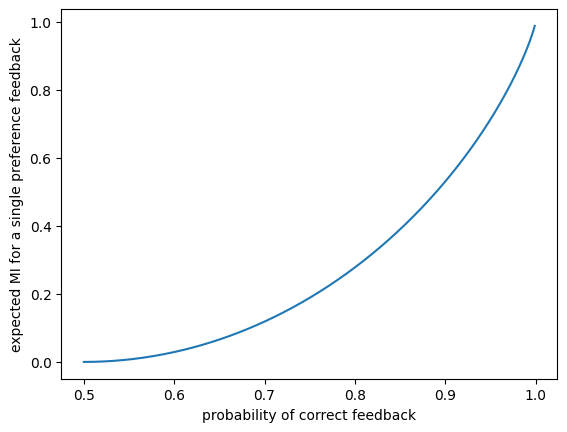

In [106]:
p = np.arange(0.5, 1.0, 0.001)
mi = 1.0 + p * np.log2(p) + (1-p) * np.log2(1-p)

fig,ax = plt.subplots(1)
ax.plot(p, mi)
ax.set_xlabel('probability of correct feedback')
ax.set_ylabel('expected MI for a single preference feedback')

Utilityの差($\Delta_{ij}$)と、βの値によって、どの程度$P_c, P_e$の値が変わるのかをプロットしたものが、以下の物。

C:\Users\ty17095\AppData\Local\Temp\ipykernel_10052\4122528273.py:7: RuntimeWarning: overflow encountered in exp
  Pe = 1.0/(1+np.exp(+b*(np.abs(d))))


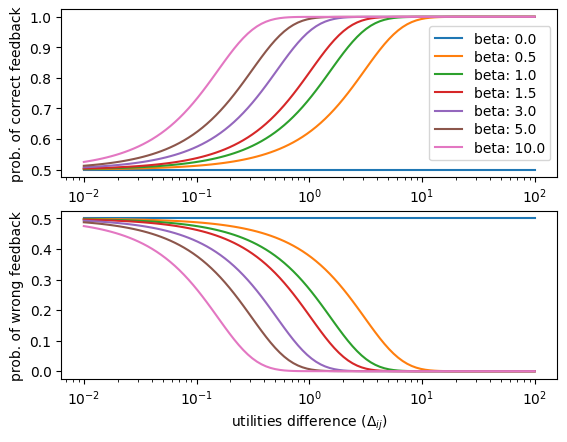

In [122]:
d = np.logspace(np.log10(0.01), np.log10(100), num=100)
beta = [0.0, 0.5, 1.0, 1.5, 3.0, 5.0, 10.0]

fig,ax = plt.subplots(2,1)
for b in beta:
    Pc = 1.0/(1+np.exp(-b*(np.abs(d))))
    Pe = 1.0/(1+np.exp(+b*(np.abs(d))))
    ax[0].semilogx(d, Pc, label=f"beta: {b}")
    ax[1].semilogx(d, Pe, label=f"beta: {b}")
ax[0].set_ylabel("prob. of correct feedback")
ax[1].set_xlabel("utilities difference ($\Delta_{ij}$)")
ax[1].set_ylabel("prob. of wrong feedback")
ax[0].legend(labelspacing=0.3)

複数のTrainerを区別せずに、Feedbackを合わせた場合に相当するRationalityの値(β)を計算する。

1. 各Trainer個別のβを用いて、正しいFeedbackする確率($P_c$)を求める。
2. それらを、Feedbackの頻度に応じて加重平均を取る。
3. 加重平均された正しいFeedbackする確率を元に、それに相当するβを求める。

In [124]:
beta = np.array([1.0, 5.0, 10.0])
d = 1.0

Pc = 1.0/(1+np.exp(-beta*d))
Pc_mean = np.mean(Pc)
beta_ = - 1/d * np.log2((1-Pc_mean)/Pc_mean)
print(beta_)

3.3048315619823536
